<a href="https://colab.research.google.com/github/saiful-aromax/AroAI/blob/master/B9AI108%20PP/CA_2_olx_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **B9AI108 CA-2: Web Scraping**
Name of Student: Saiful Islam

Student ID: 10634911

# Target Website: https://www.olx.in
**About the website:** olx.in is a Indian marketplace for free classifieds in India. It offers Buy and Sell for free anywhere in India.

It is owned by OLX Group based in Amsterdam, Netherlands.

In this project, **Category: Mobile Phones** is choosen for scraping. The link of the category: https://www.olx.in/mobile-phones_c1453

# Load Libraries

In [244]:
import requests
import json
import pandas as pd
from IPython.display import HTML

# Request Header

In [245]:
headers={'accept': '*/*',
'accept-encoding': 'gzip, deflate, br',
'accept-language': 'en-US,en;q=0.9,bn;q=0.8',
'cookie': 'laquesisff=pan-36788#pan-38000#pan-42665; __exponea_etc__=cad1d239-5ad5-44f6-8d32-5848bd47e1db; _ga=GA1.2.221381045.1680524228; _gcl_au=1.1.1334474337.1680524228; WZRK_G=76a1536a43e241f79c06485b273eb9e6; _fbp=fb.1.1680524229672.1274615751; __gads=ID=fbb62fc9404a3879:T=1680524228:S=ALNI_Mb7-qd_dz_ErPNYGpdimw4bTYNJ7A; _pbjs_userid_consent_data=3524755945110770; laquesissu=70@none|0#87@booking_location_exit|0; _hjSessionUser_1193424=eyJpZCI6ImUwMzI0MGYxLTI4ODctNTY3NC1hY2I5LTFkMDAyZjk0NTg1NSIsImNyZWF0ZWQiOjE2ODA1MjQzNDkyMzEsImV4aXN0aW5nIjp0cnVlfQ==; cto_bidid=0Q9Vql91T05sblg3bFY2cGUlMkIxVzVSQWRLZHl0YW44UVUlMkJ1eW9saWxwMFF5RE5xRTFMZnc0ZllCZnAyWiUyRk45JTJGMnNKOEVvanZ3b0IwM1o0JTJGZ0V1d1hkOFNlYW56UDdlS010WGppd1VVRkhEMVJQTzAlM0Q; bm_sz=C20839B25A121793CB365B3E0B3AB164~YAAQF7ATArtSfRCHAQAA3bPqVROlhr22J0lrqfed7uw/2DGSOZcdWLcQ+b/N2kL+lGfReQltYCpu95XjwHmKj8DqhXtlQmVGOrBdeeI0GoNtPAtgI9RixI5eycHbuPyKqe1HhpQ7mLNeLd8AHBMLlYr5wVfGmMv4WEvb1dSDMKPoZu0T6wr9ccAihYBvA5RafQNpHEa67dNN3BQ6yNgSnG7kuPTR9plXnD9iBY4a1N3ARYv1VDfOYxZIXUIyc5L/xyNqH5uk9iwuB835sqCbQXuJob6HJmGUbXIv7C/cQw==~3684404~3688002; bm_mi=A2EF6069D88B1A7CCFBD066F634E69EE~YAAQF7ATAthSfRCHAQAAa7vqVRMrBVT4gI2KIqJoncnI3ZzKVAW8tmrlDt/K+DhdxMUx6irqdrn0gmV/mGIm+Zal4/ON3JCFh7R3Fvy+Bo76WCDB5Q6AXSmEiGyPp7XH/d+b8bLpPLETxjD+KfX4+vb0Dvoc7I0JBaRVnDvzp2yikqIBsWlOPxy+/WfdmCz/JFkVrEyUcNpdR9IFTj3CWUCgpBqUW2uprmzoC1MiSziO+KM+KsREW7Ur/dZuft15n9ZVhPHS/YH+tPVt2YLHFyO4RpTg4pOG2NV1GiMrw8kjA+ofpt2ZfRaxoJhrvg==~1; __exponea_time2__=0.25252866744995117; home_page_banner=4; relevanceUser=05659569004091831; __gpi=UID=00000bfb9bde8a72:T=1680524228:RT=1680773673:S=ALNI_MZJpSXjHx5lP7Vi0UATc-uWIGYfKA; lqstatus=1680774920||||; laquesis=pan-60601@b#road-11467@b#road-30217@a; _gid=GA1.2.1770887774.1680773900; AMP_TOKEN=%24NOT_FOUND; _hjSession_1193424=eyJpZCI6IjhlNDZmOWFlLWZiOGYtNDFiOS1iZGNhLTQ2NzU3ZjE2NGRhNSIsImNyZWF0ZWQiOjE2ODA3NzQwMjgxNTEsImluU2FtcGxlIjp0cnVlfQ==; _hjAbsoluteSessionInProgress=0; _abck=420261D5148E58D6F790D7F4837D549D~0~YAAQF7ATAr11fRCHAQAAzTn1VQmw+zS/5vdQi+/rtxXRok5Gtgz+NWgQ1sss7HgVQpjEPPauNKqJflYJPNTEtyUKS1UA3lW/MH02gLsBQeEg2APt05p2d2FM95I6C0BzCZ6J8BWXWRr/YAQvHSdwQb8vp+mxEI6QtmJqGvNgyCWO0ku4wi34J0D7hljuJE1l9fBlHgJouC2vjulBH75JhYTTVK0FBpt50LAgT3k5RH+DTnvXNFbRDnhzC/54blidbjBfnLphQlbPZUwUZfDceS+PDA4zYU0s0aNdrSvAlvsUK8jtWenslGuCJ9lm/oqUT7/o+sBkikso6P1ZT2baDYwhX3eoiLhQyZEK0OaYMRBW+pazY3oIIOdnygv3yLaorpxs0s0B2EZVvGP6pY+aVLnOGRY=~-1~||-1||~-1; ak_bmsc=7C76B76A456F2B3FEE5C66EECD9DB760~000000000000000000000000000000~YAAQF7ATAot6fRCHAQAAR5v2VRPS7NAGU09NHZV6DAjpUoU3alCtglOYQEO22UT38VxZ4XKPYwJx6L2KAnYoXy39HbNopBnRXrCyHLztOwqnlni0eHrI6PoOkEM7apsdvlH4fpXTX9pox+oFqI0nJJZLJ9Cwt4iwO0LsVGlqDeSHw3YRXA+IOBaZReMJlRBsGFKrEVWEZfuvQLVfZsmD/wVqkjyD2xn/u9bZWUibemIKsXbTGJpJ9EZBfp0PCWlnGQzboKJ9xze0PclD5HfeRR9Gac/AAOxYntVgvLSf3OIWedS8JpmcRfstIzgpB6B0/GZcxCJx+sM47e2rbnsqR7xOugjWNShOLqFwh7HDeO2vAl3ewPaSjnAu/p7jLVIGbsJJ7eN5cVnMN94INyJnqP07IskAX++EpFq+2M0i6uNDxEhtxqHAxn5Cd27Fjj0tfpMbSHa9dRYk1zmSkggiJniz7xO4QOWpjF7CbFuKSlpQBA==; _uetsid=c6ac78e0d45e11ed9041c94cc6ae1a88; _uetvid=74da37b0d21911ed95c57309c34a3932; cto_bundle=-FXP_19sbHVnbFFXaHVZaER2aXpzM3MlMkZya2dhT3llY3hVNlVxNkJtazltRUFXQzUzenZvME1MejRrejVkdkxZdHBVeGZraElhd2hmQVI3cyUyRlpsTjZaMnM2ZUF5UUxNVmw1bVlGa2pIV0MlMkYlMkZTQUVBZkxZRVZUMERRcXUxbnJDZE43JTJCTXNHaWJtRTZSYlh2N3lXNElDbGRIZzNRJTNEJTNE; g_state={"i_p":1680781703911,"i_l":1}; _gat_clientNinja=1; _gat_UA-88236416-1=1; WZRK_S_848-646-995Z=%7B%22p%22%3A3%2C%22s%22%3A1680773903%2C%22t%22%3A1680774542%7D; onap=187470c9190xf066006-3-18755ee5dc1x7e493502-27-1680776346; bm_sv=D5211D2D3936C05B419A7FA735D3B2CF~YAAQF7ATAhuBfRCHAQAATUT4VRNk+tVSqKvlhFYANFVtIruUOBfJ9xEc2m+yY2FGYuh2HibRMgcKaqIKGgDcB4GpZ3s24558vTkt1vc+4ROhCVPXzikewYXSoW5MppXx7EzzXfzG2poKR5ELdADhdIpDZVm5EdmR+0FVJeadmDZUibX80lSY1Vi0hRlstQMbFkJgSOB38jaXIsyeztGun7TRLXvbwAZtnPrKA8SjsIGG5COu5/AEWQ2HQSfWYDS/eQ==~1',
'referer': 'https://www.olx.in/mobile-phones_c1453',
'sec-ch-ua': '"Google Chrome";v="111", "Not(A:Brand";v="8", "Chromium";v="111"',
'sec-ch-ua-mobile': '?0',
'sec-ch-ua-platform': '"Windows"',
'sec-fetch-dest': 'empty',
'sec-fetch-mode': 'cors',
'sec-fetch-site': 'same-origin',
'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/111.0.0.0 Safari/537.36',
'x-newrelic-id': 'VQMGU1ZVDxABU1lbBgMDUlI=',
'x-panamera-fingerprint': 'e367b66212e008282cd95e06520ead70#1680524225829'}

# Generating base DataFrame
1st for loop is for fetching data from each page on each loop. Each loop fetches 20 items. 2nd loop is for data binding for each loop/page.

Data binding into DataFrame with selected columns from original response content. For 'Description' column, '\n\n' & '\n' are replaced by '\<br>\'.

In [246]:
list = []
for i in range(3):
  url = 'https://www.olx.in/api/relevance/v4/search?category=1453&facet_limit=100&lang=en-IN&location=1000001&location_facet_limit=20&page=' + str(i) + '&platform=web-desktop&relaxedFilters=true&user=035155181169653016'
  resp=requests.get(url,headers=headers)
  for line in json.loads(resp.content)['data']:
    list.append({'Image': line['images'][0]['small']['url'], 'Title': line['title'], 'Description': line['description'].replace('\n\n', '<br>').replace('\n', '<br>'), 'Brand': line['parameters'][0]['formatted_value'], 'Price(INR)': int(round(line['price']['value']['raw'])), 'Location': line['locations_resolved'].get('SUBLOCALITY_LEVEL_1_name', '') + ', ' + line['locations_resolved']['ADMIN_LEVEL_3_name'] + ', ' + line['locations_resolved']['ADMIN_LEVEL_1_name'], 'Published at': pd.to_datetime(line['created_at'])})
# my_df = pd.DataFrame(my_list).style.bar(subset=['Price(INR)'], color='#d65f5f')
df = pd.DataFrame(list)
df

,Image,Title,Description,Brand,Price(INR),Location,Published at
0,https://apollo-singapore.akamaized.net:443/v1/...,Vivo V25 5g 45Days Bill Full Kit Box Brand New...,Vivo V25 5g 45Days Bill Full Kit Box Brand New...,Vivo,20500,"Periyar, Madurai, Tamil Nadu",2023-03-17 01:33:26+05:30
1,https://apollo-singapore.akamaized.net:443/v1/...,Vivo V25Pro under warranty,"Vivo V25Pro 8,128gb 5month old under warranty...",Vivo,28000,"Bahadurgarh Railway Station, Bahadurgarh, Haryana",2023-04-06 15:17:04+05:30
2,https://apollo-singapore.akamaized.net:443/v1/...,Samsung S23 8/256GB (11 months Warranty),Brand New.. Samsung S23 Full Box ||<br>256GB ...,Samsung,61900,"Poothole, Thrissur, Kerala",2023-04-05 22:58:59+05:30
3,https://apollo-singapore.akamaized.net:443/v1/...,Poco f1 128 gb 6 gb ram,Good condition sup camera,Other Mobiles,6000,"Balaji Nagar, Hosur, Tamil Nadu",2023-04-10 06:31:16+05:30
4,https://apollo-singapore.akamaized.net:443/v1/...,Honour 9 lite,Front and back glass. Have Slight Crack but no...,Honor,2999,"Bharanaganam, Palai, Kerala",2023-04-10 06:30:48+05:30
5,https://apollo-singapore.akamaized.net:443/v1/...,4 GB rem 64 GB storage.,New mobile h 2 months hua lene bil box charjar...,Realme,8500,"Faqirtoliya, Varanasi, Uttar Pradesh",2023-04-10 06:30:32+05:30
6,https://apollo-singapore.akamaized.net:443/v1/...,Oneplus 8. 8/128,Onepus 8 mobile neat condition not even single...,One Plus,27500,"Ramanayyapeta, Kakinada, Andhra Pradesh",2023-04-10 06:29:46+05:30
7,https://apollo-singapore.akamaized.net:443/v1/...,Redmi 10 a sport for sale ..5 month old .,Box. Charger .bill available..need money. 6gb ...,Mi,7500,"Raha Gaon, Raha, Assam",2023-04-10 06:29:09+05:30
8,https://apollo-singapore.akamaized.net:443/v1/...,iPhone 6s abhi tak khula bhi nhi hai,New condition<br>Battery health 74%<br>Speaker...,iPhone,7200,"PWD Colony, Rampur, Uttar Pradesh",2023-04-10 06:28:04+05:30
9,https://apollo-singapore.akamaized.net:443/v1/...,Mi 11X pro 5G,Premium 5G model<br>Amoled display <br>33W ori...,Mi,16500,"Moonnam Peedika, Kannur, Kerala",2023-04-10 06:27:53+05:30


# Function defination for DataFrame to HTML output with:
1. css left align design
2. Showing image
3. Reset indexing after sorting and filtering
4. Thousand separator on "Price(INR)" and date format on "Published at" columns

In [ ]:
def df_to_html(df):
  df = df.copy()
  if 'Price(INR)' in df:
    df['Price(INR)'] = df['Price(INR)'].apply(lambda x : "{:,}".format(x))
  if 'Published at' in df:
    df['Published at'] = [time.strftime('%d-%b-%y %I:%M:%p') for time in df['Published at']]
  return HTML(df.reset_index(drop=True).to_html(escape=False, formatters=dict(Image=path_to_image_html)).replace('<td>', '<td style="text-align: left; vertical-align: top">').replace('<th>', '<th style="text-align: left">'))

def path_to_image_html(path):
    return '<img src="'+ path + '" width="60" >'

# Implementing HTML

In [ ]:
df_to_html(df)

,Image,Title,Description,Brand,Price(INR),Location,Published at
0,,OnePlus 10 t (12/256),25 day old,One Plus,"45,000","Goldar Patti, Bettiah, Bihar",08-Apr-23 11:11:AM
1,,Vivo v25 pro 12/256gb Neat and clean condition 6 month old .,Phone is in flawless condition Bill box charger complete All original You can visit our store Kb enterprise Near shivam banquet Ramlila maidan Road.Feel free to call .,Vivo,"29,999","Karula, Moradabad, Uttar Pradesh",02-Apr-23 12:30:PM
2,,Apple iPhone 6 6s 7 8 8Plus SE X XR XS XS Max lesss Price With Waranty,Apple iPhone 6 6plus 6s 6s plus 7 7plus 8 8plus SE SE 2 SE 3X XR Xs XS Max |16GB| 32GB| 64GB| 128GB| 256GB Good WorkingReasonable PriceHuge CollectionsAll Apple Products available| iPhone available with reasonable priceit’s a Status SymbolAvailable Huge CollectionsBill and Trusted WarrantyVisit in Office,iPhone,"6,999","Koramangala, Bengaluru, Karnataka",29-Mar-23 06:32:PM
3,,I phone x 64 gb,I phone x 64 gbCamera bey bund che Charging nathi Only mobile,iPhone,"9,500","Baharpura, Dhoraji, Gujarat",10-Apr-23 05:59:AM
4,,"Vivo Y16 (Drizzling Gold, 4GB RAM, 64GB Storage","Vivo Y16 (Drizzling Gold, 4GB RAM, 64GB StorageI'm buy new samsung mobile so I'll sale this mobile otherwise excellent mobile just 2 months used with bill and box available Contact",Vivo,"9,500","Anna Nagar, Coimbatore, Tamil Nadu",10-Apr-23 05:59:AM
5,,Redmi note 8pro good condition 6 64 display change mobile only,Good working condition exchange available,Mi,"6,900","Surveyor Colony, Madurai, Tamil Nadu",10-Apr-23 05:58:AM
6,,Redmi note 7pro in good condition,Wanna sell my note 7 pro 4/64 in awesome condition,Mi,"5,300","Maisuma, Srinagar, Jammu & Kashmir",10-Apr-23 05:57:AM
7,,Google pixel 4a 6gb Ram 128 GB internal memory,Brand new condition very very good condition mobile only,Google Pixel,"12,000","Poonamallee, Chennai, Tamil Nadu",06-Apr-23 01:25:PM
8,,"Nord ce 2, Exchange only 5g",65 wat chargerBilkul new conditionDisplay local hai but original jaisa hAbhilable bill box chargerOnly 5g device se exchange hoga,One Plus,150,"Rithala, Delhi, Delhi",10-Apr-23 05:56:AM
9,,Samsung galaxy S22 ultra 12 gb ram 256 gb rom,Affordable price available,Samsung,"30,000","Arpora, Calangute, Goa",10-Apr-23 05:56:AM


# No of items per Brand

In [ ]:
res = pd.DataFrame(df['Brand'].value_counts().reset_index())
res.columns = ['Brand', 'No of Items']
df_to_html(res)

,Brand,No of Items
0,Samsung,24
1,iPhone,19
2,Vivo,4
3,One Plus,3
4,Mi,2
5,Realme,2
6,LG,2
7,Oppo,2
8,Google Pixel,1
9,Other Mobiles,1


# Brand-wise sum of advertisement

In [ ]:
res = df.groupby('Brand')['Price(INR)'].sum().reset_index()
res.columns = ['Brand', 'Total Amount(INR)']
res = res.sort_values(by=['Total Amount(INR)'], ascending=False)
res['Total Amount(INR)'] = res['Total Amount(INR)'].apply(lambda x : "{:,}".format(x))
df_to_html(res)

,Brand,Total Amount(INR)
0,Samsung,"644,950"
1,iPhone,"590,908"
2,One Plus,"81,150"
3,Vivo,"65,498"
4,LG,"44,899"
5,Oppo,"32,999"
6,Realme,"14,499"
7,Mi,"12,200"
8,Google Pixel,"12,000"
9,Other Mobiles,"9,000"


# Average price of each item per Brand

In [ ]:
res = df.groupby('Brand')['Price(INR)'].mean().round().reset_index()
res.columns = ['Brand', 'Averae Price(INR)']
res = res.sort_values(by=['Averae Price(INR)'], ascending=False)
res['Averae Price(INR)'] = res['Averae Price(INR)'].apply(lambda x : "{:,}".format(x))
df_to_html(res)

,Brand,Averae Price(INR)
0,iPhone,"31,100.0"
1,One Plus,"27,050.0"
2,Samsung,"26,873.0"
3,LG,"22,450.0"
4,Oppo,"16,500.0"
5,Vivo,"16,374.0"
6,Google Pixel,"12,000.0"
7,Other Mobiles,"9,000.0"
8,Realme,"7,250.0"
9,Mi,"6,100.0"


# Items having price > 30000 INR

In [ ]:
res = df[df['Price(INR)'] > 30000]
df_to_html(res)

,Image,Title,Description,Brand,Price(INR),Location,Published at
0,,OnePlus 10 t (12/256),25 day old,One Plus,"45,000","Goldar Patti, Bettiah, Bihar",08-Apr-23 11:11:AM
1,,Samsung Galaxy A54 5G Latest Model New,"Samsung Galaxy A54 5G Latest Model New, bought from Dubai yesterday only wifi activated New phone to carry to India.",Samsung,"32,500","Sector 57, Gurgaon, Haryana",10-Apr-23 05:58:AM
2,,Apple Series 8 Watch ultra 49mm titanium,Seal box unused not even remove the plastic display seal cover.,iPhone,"75,000","Gachibowli, Hyderabad, Telangana",10-Apr-23 05:54:AM
3,,14 6gb 126gb,"3 months old only, no scratches and functionality also good",iPhone,"65,000","Bommanahalli, Bengaluru, Karnataka",10-Apr-23 05:54:AM
4,,12 pro max 128gb,The condition is great. Only phone and charging cable available,iPhone,"48,000","Sadar Bazaar Area, Delhi, Delhi",10-Apr-23 05:55:AM
5,,Iphone 11 / 128gb,iPhone 11 /128 gb,iPhone,"42,000",", Gwalior, Madhya Pradesh",10-Apr-23 05:54:AM
6,,Samsung Galaxy S21 Ultra,We'll maintained condition with Bill box accessories. Geniune buyers contact me only. No time pass and cheap offers other will get blocked directly.Thank You,Samsung,"45,000","Central Avenue, Kolkata, West Bengal",10-Apr-23 05:52:AM
7,,Sumsung 21 ultra,Screen side damage,Samsung,"35,000","Canca, Mapusa, Goa",10-Apr-23 05:51:AM
8,,I phone 13 256GB,I phone 13 256GB Full Box With Charger Adapter Blue colourUnder Warranty PeriodMay 04 Warrenty Date9️⃣7️⃣4️⃣7️⃣1️⃣1️⃣5️⃣6️⃣8️⃣3️⃣,iPhone,"56,000","Chambakkara, Kochi, Kerala",10-Apr-23 05:49:AM
9,,iPhone 13 128gb all accessories bill box,All accessories bill box full kit,iPhone,"35,711","20 Dukan, Jaipur, Rajasthan",05-Apr-23 01:14:PM


# Items having Brand: Samsung only

In [ ]:
res = df[df['Brand'] == 'Samsung']
df_to_html(res)

,Image,Title,Description,Brand,Price(INR),Location,Published at
0,,Samsung galaxy S22 ultra 12 gb ram 256 gb rom,Affordable price available,Samsung,"30,000","Arpora, Calangute, Goa",10-Apr-23 05:56:AM
1,,Samsung Galaxy A54 5G Latest Model New,"Samsung Galaxy A54 5G Latest Model New, bought from Dubai yesterday only wifi activated New phone to carry to India.",Samsung,"32,500","Sector 57, Gurgaon, Haryana",10-Apr-23 05:58:AM
2,,Samsung J200G Excellent condition,Only phone no bill box or charger. Only face to face deal,Samsung,"1,900","Liluah, Howrah, West Bengal",10-Apr-23 05:56:AM
3,,Samsung M31,Phone is in very good condition,Samsung,"11,150","Rashidpur Garhi, Bijnor, Uttar Pradesh",10-Apr-23 05:55:AM
4,,Samsung galaxy S22 ultra 12 gb ram 256 gb rom,Affordable price available,Samsung,"30,000",", Dari, Jharkhand",10-Apr-23 05:55:AM
5,,Samsung galaxy S22 ultra 12 gb ram 256 gb rom,Affordable price available,Samsung,"30,000","Ahambhavi, Ballari, Karnataka",10-Apr-23 05:55:AM
6,,samsung s20 12/128 Gb with box,hello everyone i would like to sell my brand new samsung galaxy s20 blue 12/128GB which is just a month old got this from Singapore it's in sealed condition not much used with complete box and accessories in excellent condition outstanding performance and battery with pro camera if anyone interested genuinely can call me on my number asap bargainers kindly stay away don't waste the time thanks,Samsung,"27,000","Mithila Nagar, Hyderabad, Telangana",08-Apr-23 06:42:PM
7,,Samsung galaxy S22 ultra 12 gb ram 256 gb rom,Affordable price available,Samsung,"28,900","Chemmathatta, Chiranellur, Kerala",10-Apr-23 05:54:AM
8,,Samsung galaxy S22 ultra 12 gb ram 256 gb rom,Affordable price available,Samsung,"30,000","Jitegaon, Chitegaon, Maharashtra",10-Apr-23 05:53:AM
9,,Samsung galaxy S22 ultra 12 gb ram 256 gb rom,Affordable price available,Samsung,"30,000","Potsangbam Khoiru, Sekmai Bazar, Manipur",10-Apr-23 05:53:AM


# Items having price between 25000 INR to 55000 INR inclusive & sorting by price

In [ ]:
res = df[(df['Price(INR)'] >= 25000) & (df['Price(INR)'] <= 55000)].sort_values(by=['Price(INR)'])
df_to_html(res)

,Image,Title,Description,Brand,Price(INR),Location,Published at
0,,Oppo Reno 6pro 5g 12gb 256gb special edition,Gold colour special editionLook like new phoneAll accessoriesMoney needed,Oppo,"25,999","Amalapuram R, Amalapuram, Andhra Pradesh",10-Apr-23 05:48:AM
1,,I phone 11/64gb,Fresh condition all working display change,iPhone,"26,000","Kashinagar, Lakhimpur, Uttar Pradesh",10-Apr-23 05:55:AM
2,,samsung s20 12/128 Gb with box,hello everyone i would like to sell my brand new samsung galaxy s20 blue 12/128GB which is just a month old got this from Singapore it's in sealed condition not much used with complete box and accessories in excellent condition outstanding performance and battery with pro camera if anyone interested genuinely can call me on my number asap bargainers kindly stay away don't waste the time thanks,Samsung,"27,000","Mithila Nagar, Hyderabad, Telangana",08-Apr-23 06:42:PM
3,,I PHONE 11 (64) FOR SALE…,PHONE IN NEAT CONDITION WITH BILL BOX AND ORIGINAL CHARGER AVAILABLE WITHOUT SINGLE DENT INTERESTED PERSONS CAN MESSAGE ME.,iPhone,"27,000","Shah Sahib Gutta, Mahbubnagar, Telangana",10-Apr-23 05:51:AM
4,,I phone 13 pro Mx 128 Gb great discounted Rifubrished phone hurry up,"I'm Selling iPhone with Warranty. It's a Refurbished Mobile with no scratch or dent. I'm providing Box, Charger and HeadphoneDm me for Cash on delivery OrdersDelivery Available in 2 days of order bookingLimited period offer. Order Fast and Avail Offer.",iPhone,"28,500","Bajrang Complex, Bilaspur, Chhattisgarh",10-Apr-23 05:54:AM
5,,I phone 13 pro Mx 128 Gb great discounted Rifubrished phone hurry up,"I'm Selling iPhone with Warranty. It's a Refurbished Mobile with no scratch or dent. I'm providing Box, Charger and HeadphoneDm me for Cash on delivery OrdersDelivery Available in 2 days of order bookingLimited period offer. Order Fast and Avail Offer.",iPhone,"28,500","Anand Nagar, Raipur, Chhattisgarh",10-Apr-23 05:47:AM
6,,I phone 13 pro Mx 128 Gb great discounted Rifubrished phone hurry up,"I'm Selling iPhone with Warranty. It's a Refurbished Mobile with no scratch or dent. I'm providing Box, Charger and HeadphoneDm me for Cash on delivery OrdersDelivery Available in 2 days of order bookingLimited period offer. Order Fast and Avail Offer.",iPhone,"28,500","Adarsh Nagar, Bhilai, Chhattisgarh",10-Apr-23 05:52:AM
7,,Samsung galaxy S22 ultra 12 gb ram 256 gb rom,Affordable price available,Samsung,"28,900","Chemmathatta, Chiranellur, Kerala",10-Apr-23 05:54:AM
8,,LG Wing 8/256GB Storage - Brand New Never Used With Bill.,"LG Wing 8/256GB Storage - Brand New Unused With Bill.This device is in unblemished condition, Absolutely Clean. Comes with Valid Invoice. - Credit Cards Accepted | EMI Offered. -- Exchange Offers Available. -- Pre loved phone with invoice.Best possible price offered.Come visit us for exciting deals and offers at mindblowing pricesA surreal technology experience awaits you. Visit us - 844 Dastur Meher RoadNear Taboot StreetPune.",LG,"29,900","MG Road, Pune, Maharashtra",06-Apr-23 11:41:AM
9,,Vivo v25 pro 12/256gb Neat and clean condition 6 month old .,Phone is in flawless condition Bill box charger complete All original You can visit our store Kb enterprise Near shivam banquet Ramlila maidan Road.Feel free to call .,Vivo,"29,999","Karula, Moradabad, Uttar Pradesh",02-Apr-23 12:30:PM


# Items published in March, 2023 & sorting

In [ ]:
res = df[df['Published at'].dt.strftime('%Y-%m') == "2023-03"]
res = res.sort_values(by=['Published at'])
df_to_html(res)

,Image,Title,Description,Brand,Price(INR),Location,Published at
0,,Get 1 year warranty iphone refurbished model with bill,iPhone refurbished availableModelsColours garanteeWarrantyReplacementFresh iPhoneBill boxShipping charges advance,iPhone,"20,199",", Panisagar, Tripura",14-Mar-23 01:58:PM
1,,LG G8X 128GB DUAL SCREEN IN GOOD CONDITION WITH ALL ACCESSORIES,LG G8X 8/128GB IN GOOD CONDITION WITH ALL ACCESSORIESDUAL SCREENDUAL SIM AVAILABLE AT LOWEST PRICEINSTANT CASH FOR UR MOBILES AND GADGETS WE DEALS IN NEW AND USED GADGETS SALES AND SERVICES REPAIRING ALSO AVAILABLEEXCHANGE AVAILABLE FOR USED MOBILES AND GADGETS FOR MORE MOBILES UPDATES FOLLOW US ON OLX DEBIT AND CREDIT CARDS ACCEPTED EMI AVAILABLE ON CREDIT CARD SHOP TIMING 11AM TO 10PM (ALL DAYS OPEN)HOME DELEVERY AVAILABLE IN PUNE COURIER SERVICE AVAILABLE ALL OVER INDIA DONT CALL JUST VISIT OUR STORE ASAP OR MESSAGE ON WHATSAPP THE MOBILE EXPRESS19MG ROAD SUNDER PLAZA BUILDING NEXT TO WOODLAND OPPOSITE ESBEDA SHOWROOM CAMP PUNE 411001,LG,"14,999","East Street Road, Pune, Maharashtra",26-Mar-23 01:12:PM
2,,Iphone 8 Plus - 64 GB,"White - 64 - brilliant condition, with charger",iPhone,"12,000","Malad West, Mumbai, Maharashtra",27-Mar-23 11:27:AM
3,,Apple iPhone 6 6s 7 8 8Plus SE X XR XS XS Max lesss Price With Waranty,Apple iPhone 6 6plus 6s 6s plus 7 7plus 8 8plus SE SE 2 SE 3X XR Xs XS Max |16GB| 32GB| 64GB| 128GB| 256GB Good WorkingReasonable PriceHuge CollectionsAll Apple Products available| iPhone available with reasonable priceit’s a Status SymbolAvailable Huge CollectionsBill and Trusted WarrantyVisit in Office,iPhone,"6,999","Koramangala, Bengaluru, Karnataka",29-Mar-23 06:32:PM


# Items published between 2nd April, 2023 to 12th April, 2023 & sorting

In [ ]:
res = df[(df['Published at'].dt.strftime('%Y-%m-%d') >= "2023-04-02") & (df['Published at'].dt.strftime('%Y-%m-%d') <= "2023-04-12")]
res = res.sort_values(by=['Published at'])
df_to_html(res)

,Image,Title,Description,Brand,Price(INR),Location,Published at
0,,Vivo v25 pro 12/256gb Neat and clean condition 6 month old .,Phone is in flawless condition Bill box charger complete All original You can visit our store Kb enterprise Near shivam banquet Ramlila maidan Road.Feel free to call .,Vivo,"29,999","Karula, Moradabad, Uttar Pradesh",02-Apr-23 12:30:PM
1,,iPhone 13 128gb all accessories bill box,All accessories bill box full kit,iPhone,"35,711","20 Dukan, Jaipur, Rajasthan",05-Apr-23 01:14:PM
2,,Vivo x60 5G 128gb 8gb ram,Neat and clean pieceNo single scratch no replacementNo complaintsPhone only,Vivo,"16,999","Kuttichira, Kozhikode, Kerala",06-Apr-23 01:53:AM
3,,LG Wing 8/256GB Storage - Brand New Never Used With Bill.,"LG Wing 8/256GB Storage - Brand New Unused With Bill.This device is in unblemished condition, Absolutely Clean. Comes with Valid Invoice. - Credit Cards Accepted | EMI Offered. -- Exchange Offers Available. -- Pre loved phone with invoice.Best possible price offered.Come visit us for exciting deals and offers at mindblowing pricesA surreal technology experience awaits you. Visit us - 844 Dastur Meher RoadNear Taboot StreetPune.",LG,"29,900","MG Road, Pune, Maharashtra",06-Apr-23 11:41:AM
4,,Google pixel 4a 6gb Ram 128 GB internal memory,Brand new condition very very good condition mobile only,Google Pixel,"12,000","Poonamallee, Chennai, Tamil Nadu",06-Apr-23 01:25:PM
5,,Samsung Any Model Available,No Cibil No Bank Account No Local Proff No PAN Card only Aadhaar Card,Samsung,"8,000","MVP Sector 7, Visakhapatnam, Andhra Pradesh",06-Apr-23 09:46:PM
6,,OnePlus 10 t (12/256),25 day old,One Plus,"45,000","Goldar Patti, Bettiah, Bihar",08-Apr-23 11:11:AM
7,,samsung s20 12/128 Gb with box,hello everyone i would like to sell my brand new samsung galaxy s20 blue 12/128GB which is just a month old got this from Singapore it's in sealed condition not much used with complete box and accessories in excellent condition outstanding performance and battery with pro camera if anyone interested genuinely can call me on my number asap bargainers kindly stay away don't waste the time thanks,Samsung,"27,000","Mithila Nagar, Hyderabad, Telangana",08-Apr-23 06:42:PM
8,,OnePlus 10 t 256,OnePlus 10 t 256,One Plus,"36,000","Chenippadi, Kumaranellur, Kerala",09-Apr-23 04:36:PM
9,,IPHONE 11 64GB BATTERY HEALTH 100%CONDITION WITH ALL ACCESSORIES,IPHONE 11 64GB UNUSED PHONE AVAILABLE AT LOWEST PRICES EVER IN EXCELLENT CONDITION WITH ALL ACCESSORIES DUAL SIM BATTERY HEALTH 100% CONDITION INDIAN PURCHASE INSTANT CASH FOR UR MOBILES AND GADGETS WE DEALS IN NEW AND USED GADGETS SALES AND SERVICES REPAIRING ALSO AVAILABLEEXCHANGE AVAILABLE FOR USED MOBILES AND GADGETS FOR MORE MOBILES UPDATES FOLLOW US ON OLX DEBIT AND CREDIT CARDS ACCEPTED EMI AVAILABLE ON CREDIT CARD SHOP TIMING 11AM TO 10PM (ALL DAYS OPEN)HOME DELEVERY AVAILABLE IN PUNE COURIER SERVICE AVAILABLE ALL OVER INDIA DONT CALL JUST VISIT OUR STORE ASAP OR MESSAGE ON WHATSAPP THE MOBILE EXPRESS19MG ROAD SUNDER PLAZA BUILDING NEXT TO WOODLAND OPPOSITE ESBEDA SHOWROOM CAMP PUNE 411001,iPhone,"23,999","Central Street Camp, Pune, Maharashtra",10-Apr-23 05:46:AM


# ***Data Visualization***

# Bar Graph: **Brands vs No of items**

<Axes: xlabel='Brand'>

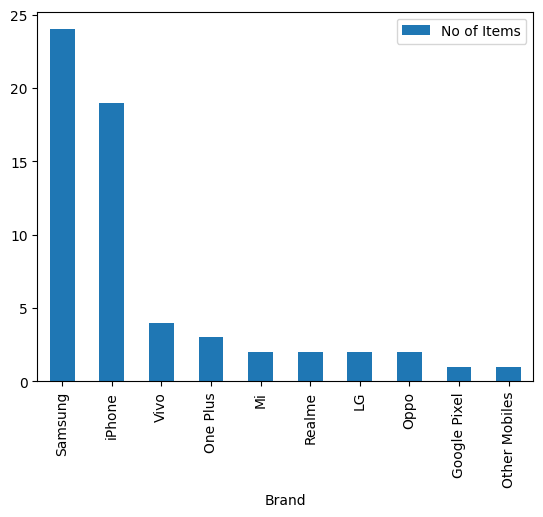

In [ ]:
res = pd.DataFrame(df['Brand'].value_counts().reset_index())
res.columns = ['Brand', 'No of Items']
res.plot(x='Brand', y='No of Items', kind='bar')

# Bar Graph: **No of Ads per Week**

<Axes: xlabel='Week'>

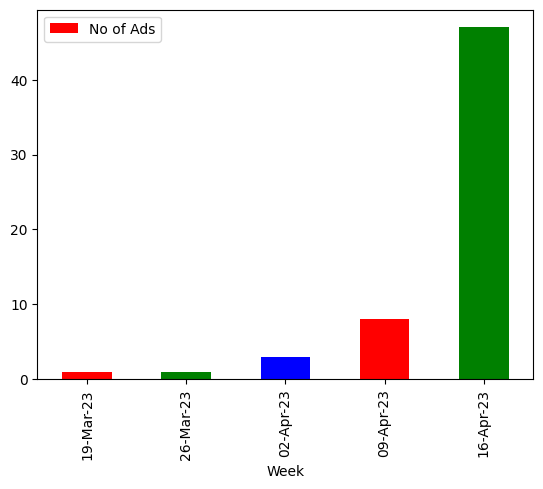

In [ ]:
res = df.groupby(pd.Grouper(key="Published at", freq="1W"))['Title'].count().reset_index()
res.columns = ['Week', 'No of Ads']
res['Week'] = [time.strftime('%d-%b-%y') for time in res['Week']]
res.plot(x='Week', y='No of Ads', kind='bar', color=['r', 'g', 'b'])

# Bar Graph: **Sum of Price per Month**

<Axes: xlabel='Month'>

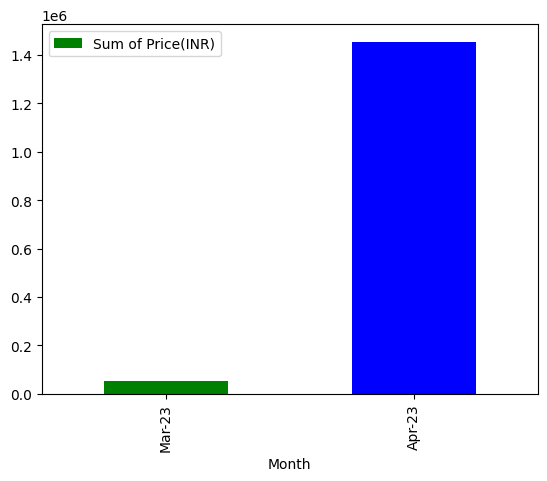

In [ ]:
res = df.groupby(pd.Grouper(key="Published at", freq="1M"))['Price(INR)'].sum().reset_index()
res.columns = ['Month', 'Sum of Price(INR)']
res['Month'] = [time.strftime('%b-%y') for time in res['Month']]
res.plot(x='Month', y='Sum of Price(INR)', kind='bar', color=['g', 'b', 'r'])

# Scatterplot: **Daily advertisement activity**

<Axes: xlabel='Published at', ylabel='Price(INR)'>

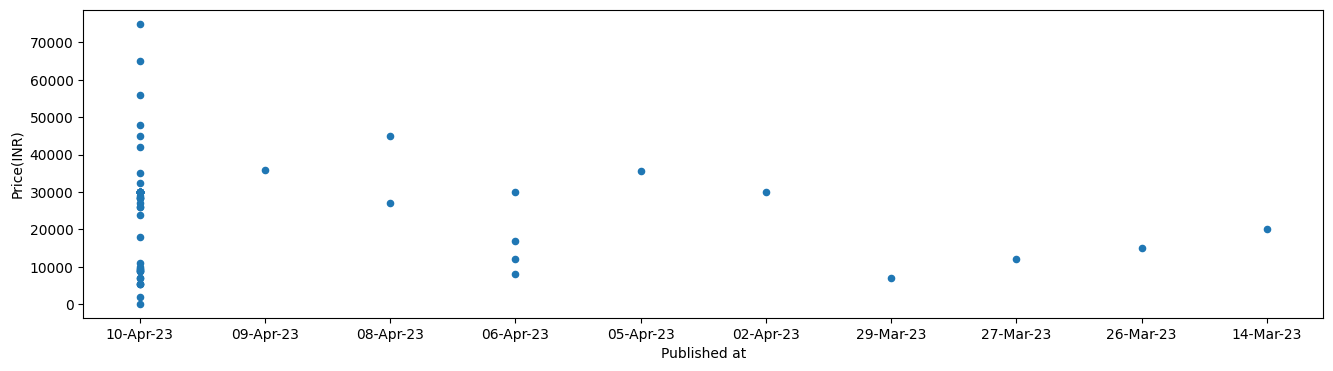

In [ ]:
res = df.copy()
res = res.sort_values(by=['Published at'], ascending=False)
res['Published at'] = [time.strftime('%d-%b-%y') for time in res['Published at']]
res.plot.scatter(x='Published at', y='Price(INR)', cmap='gray', figsize = (16, 4))

# Bar Graph: **Brand-wise total amount**

<Axes: xlabel='Brand'>

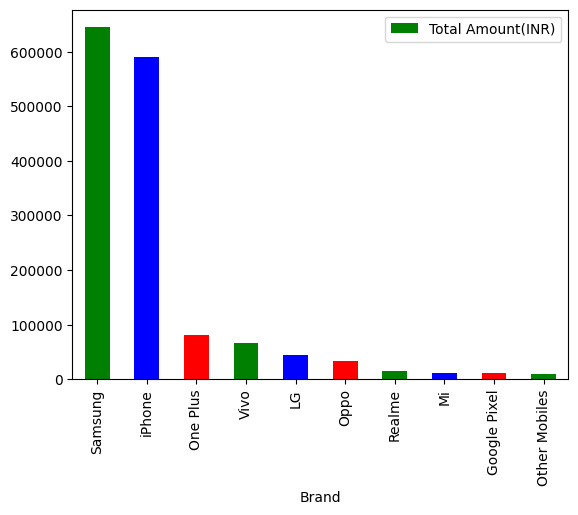

In [ ]:
res = df.groupby('Brand')['Price(INR)'].sum().reset_index()
res.columns = ['Brand', 'Total Amount(INR)']
res = res.sort_values(by=['Total Amount(INR)'], ascending=False)
res.plot(x='Brand', y='Total Amount(INR)', kind='bar', color=['g', 'b', 'r'])

# Bar Graph: **Brand-wise average price of each item**

<Axes: xlabel='Brand'>

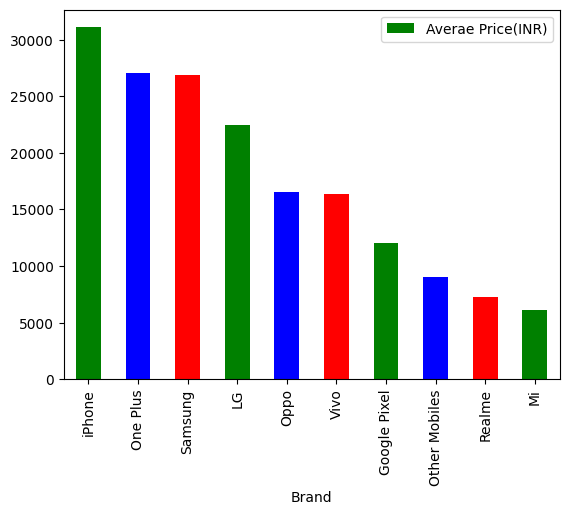

In [ ]:
res = df.groupby('Brand')['Price(INR)'].mean().round().reset_index()
res.columns = ['Brand', 'Averae Price(INR)']
res = res.sort_values(by=['Averae Price(INR)'], ascending=False)
res.plot(x='Brand', y='Averae Price(INR)', kind='bar', color=['g', 'b', 'r'])

# Scatterplot: **Last 10 advertisements of brand: iPhone**

<Axes: xlabel='Published at', ylabel='Price(INR)'>

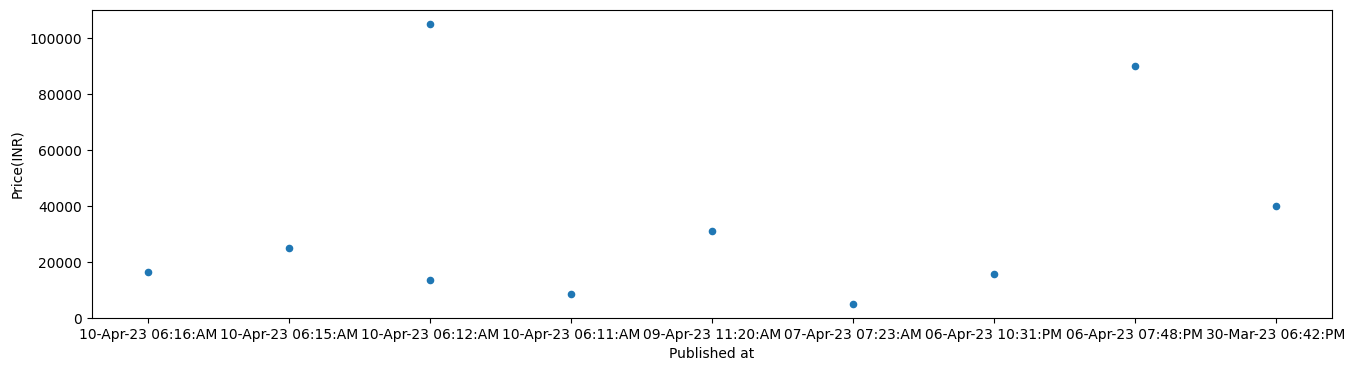

In [253]:
res = df.copy()
res = df[df['Brand'] == 'iPhone']
res = res.sort_values(by=['Published at'], ascending=False)
res = res[-10:]
res['Published at'] = [time.strftime('%d-%b-%y %I:%M:%p') for time in res['Published at']]
res.plot.scatter(x='Published at', y='Price(INR)', figsize = (16, 4))

